In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Set some global plot defaults
sns.set(rc={"figure.figsize": (15, 8), 'legend.fontsize': 18}) # figsize and leg fontsize of seaborn plots
plt.rc('axes',  labelsize=18)                                  # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)                                  # fontsize of the tick labels
plt.rc('ytick', labelsize=18)                                  # fontsize of the tick labels

------

As part of the data storytelling chapter of the course, this notebook will explore the dataset and present some of the findings. In particular, I want to look into quarterbacks. Let's get started. 

First, we load the cleaned dataset. 

In [3]:
df = pd.read_pickle('data/cleaned_df.pkl')
#Coerce the round and year columns to int
df['round'] = df['round'].astype(int) 
df['year']  = df[ 'year'].astype(int)

As a quick reminder for ourselves, let's print out a few rows. 

In [4]:
df.sample(5)

,name,year,college,position,height,weight,fortyyd,vertical,bench,threecone,shuttle,broad,wonderlic,nflgrade,arms,hands,team,round,pick,overall
3093,Alex Holmes,2005,Southern California,TE,74.0,265.0,5.04,33.0,18.0,7.19,4.35,114.0,25.0,5.3,32.5,9.500,NaN,-1,-1.0,-1.0
1314,Chris Conte,2011,California,FS,74.0,197.0,4.52,35.5,18.0,7.01,4.19,127.0,25.0,5.3,30.5,9.125,Bears,3,29.0,93.0
4639,DeMarcus Curry,1999,NaN,OT,77.0,317.0,5.35,25.5,20.0,7.19,4.69,98.0,25.0,5.3,32.5,9.500,NaN,-1,-1.0,-1.0
5936,Christian Jones,2014,Florida State,OLB,75.0,240.0,4.68,33.5,21.0,7.19,4.35,115.0,25.0,5.3,32.5,9.500,NaN,-1,-1.0,-1.0
2403,Jonathan Zenon,2008,LSU,CB,72.0,191.0,4.48,33.0,21.0,7.19,4.35,114.0,25.0,5.3,32.5,9.500,NaN,-1,-1.0,-1.0


Good. Now, we can subset the dataframe to select only quarterbacks (QB). This will be the dataframe we will use in this notebook.

In [5]:
qb = df[df.position == 'QB']

One of the first things to ask is how many QBs are in the dataset per year. Is it pretty consistent over the years or does it vary? We can plot this, as shown below. Each year has the number of QBs printed at each point. The mean is represented by the red dotted line. 

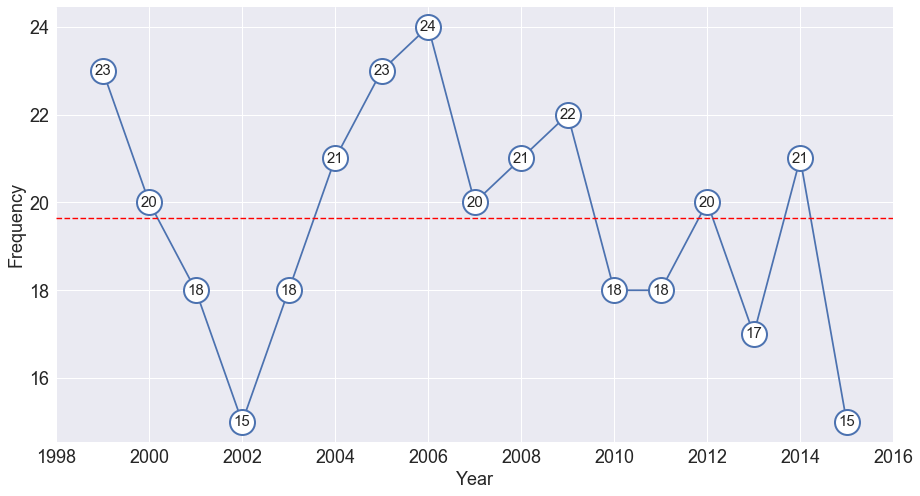

In [6]:
ax = qb.groupby('year').size().plot(figsize=(15,8), marker='o', ms=25, mew=2, mfc='white')
plt.axhline(qb.groupby('year').size().mean(), color='red', ls='--', lw=1.4)
for i,j in qb.groupby('year').size().iteritems():
    ax.annotate(j, (i,j), fontsize=15, va='center', ha='center')
plt.xlim(1998,2016)
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.show()

We can see that generally there 20 or so QBs every year with some notable exceptions. Along with a few years with a above average number of QBs, like 2006, there are a few years with a below average number of QBs, like 2002. There are probably a multitude of factors which we can hazard a guess for, but it is likely outside the scope of this project. 

But it is interesting to see the distribution over time. We can also look at the distribution of QBs as a function of draft round. Remember that a round of -1 means the player was undrafted. Below is the table of QBs per round.

In [7]:
qb.groupby('round').size()

round
-1    141
 1     47
 2     19
 3     22
 4     23
 5     29
 6     27
 7     26
dtype: int64

It should not be too surprising to see that a large portion of QBs do not get drafted. The QB is the most important position on the team so it is also the most scrutinized. There are only a few QBs on any single team, so teams are judicious in selecting potential replacements. In that same vein, it should be expected that the first round is the most popular to draft a QB. It is the first opportunity to select a player and QB-needy teams likely need to prioritize that position over others. This importance means teams often gamble to get "their" guy who can be the starting QB for a decade or more.

It is is also worth checking out how QBs are drafted per round per year. This is best visualized in a heatmap, as done below.

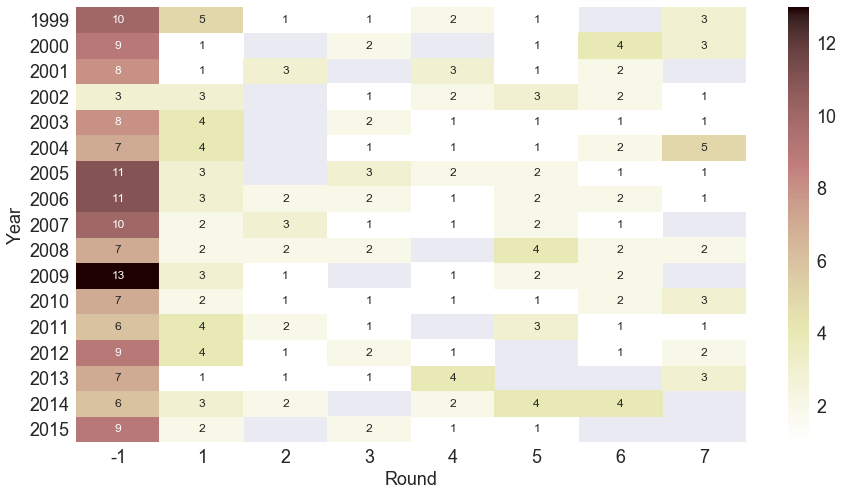

In [8]:
sns.heatmap(qb.groupby(['year','round']).size().unstack(), annot=True, annot_kws={"size":12}, cmap="pink_r")
plt.ylabel('Year')
plt.xlabel('Round')
plt.show()

We can look at this plot along with the previous plot to note some interesting years. In general, a QB is always selected in the first round. Again, no surprises here. The 2009 draft is quite surprising. It had an above average 22 QBs but also let 13 of them go undrafted. Yikes. Only 2015 had a (marginally) worse percentage of players go undrafted, as seen below.

In [9]:
qb.groupby(['year','round']).size().unstack()[-1]/qb.groupby(['year','round']).size().unstack().T.sum()*100

year
1999    43.478261
2000    45.000000
2001    44.444444
2002    20.000000
2003    44.444444
2004    33.333333
2005    47.826087
2006    45.833333
2007    50.000000
2008    33.333333
2009    59.090909
2010    38.888889
2011    33.333333
2012    45.000000
2013    41.176471
2014    28.571429
2015    60.000000
dtype: float64

The average over all years is about 42%, so both 2009 and 2015 are pretty below average in terms of undrafted QBs. 

In [10]:
(qb.groupby(['year','round']).size().unstack()[-1]/qb.groupby(['year','round']).size().unstack().T.sum()).mean()*100

41.985545128692415

We can also look at which teams have drafted QBs by plotting it. This is done below. The red line represents the median of the number of QBs drafted per team. 

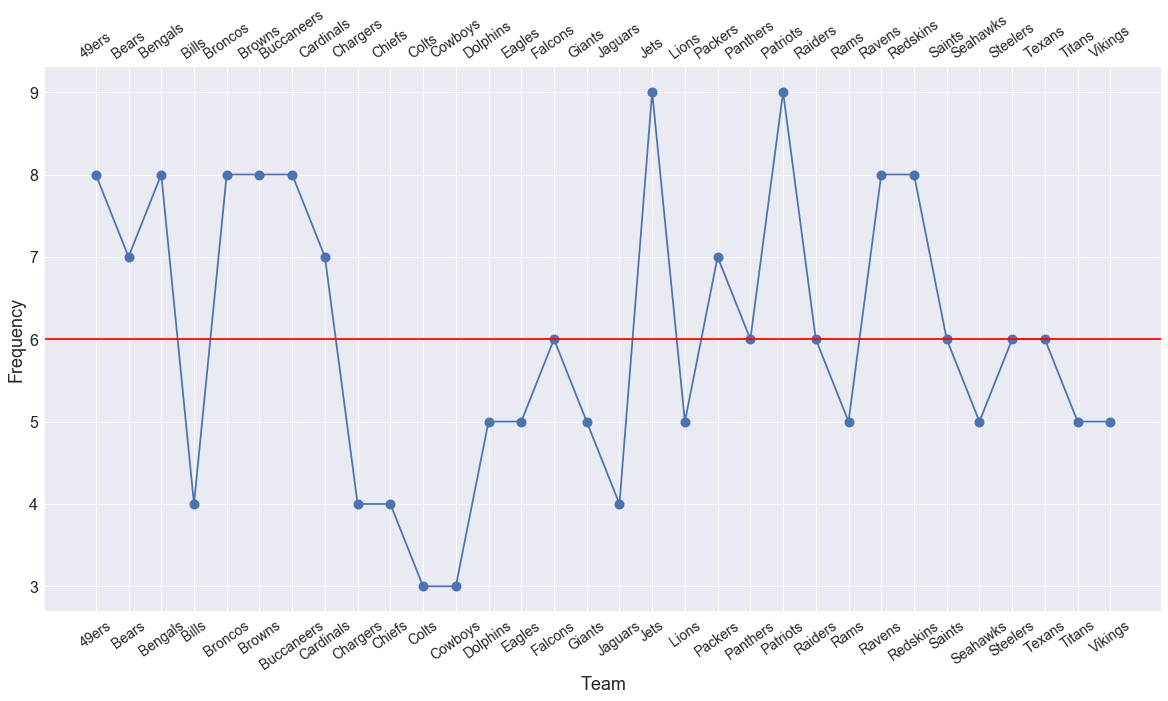

In [11]:
x = np.arange(qb.team.value_counts().count())

plt.figure(figsize=(20,10))
plt.xticks(x, qb.groupby('team').size().index, rotation=35, fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.grid(True)
plt.plot(x, qb.groupby('team').size(), 'o-', ms=10)
plt.axhline(qb.groupby('team').size().median(), color='red')
plt.tick_params(labeltop=True)
    
plt.show()

Considering this dataset covers 1999 to 2015, the teams with the most drafted QBs make some sense (given knowledge of the NFL landscape). The teams who have tended not to have a long term starter at QB during this period show peaks in this distribution, although a notable exception does exist with the Patriots. 

Let's switch gears to some of the actual measurables in the data along with the draft round info (the target variable in the analysis). We can pick out those interesting columns and make a heatmap. This shows an overall picture of how the variables are correlated. Positive and negative values are in purple and green, respectively. 

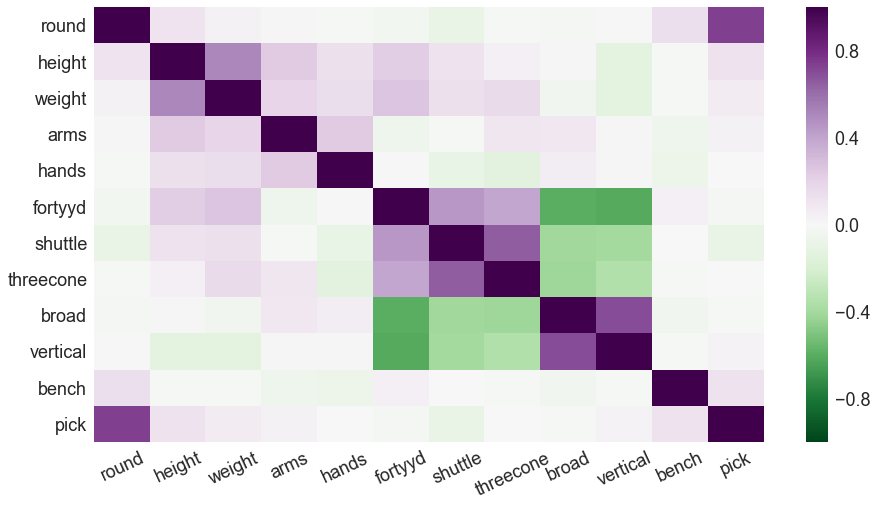

In [12]:
cols_for_qb = ['round','height','weight','arms','hands','fortyyd','shuttle','threecone','broad','vertical','bench','pick']

sns.heatmap(qb[cols_for_qb].corr(), cmap='PRGn_r')
plt.xticks(rotation=25)
plt.show()

We can see how certain variables are pretty well (anti-)correlated. For instance, the fortyyd and vertical are relatively strongly anti-correlated. These values represent the 40 yd sprint and vertical jump drills, so perhaps this should be expected: the muscle groups involved are different for each drill. This is reinforced by the strong correlation between the broad (or standing long jump) and vertical jumps. However, this data is for all QBs in this dataset. How does it look for QBs that were actually drafted? 

We can re-do this heatmap with that constraint. As an added visual for this plot, we can also print the correlation values. 

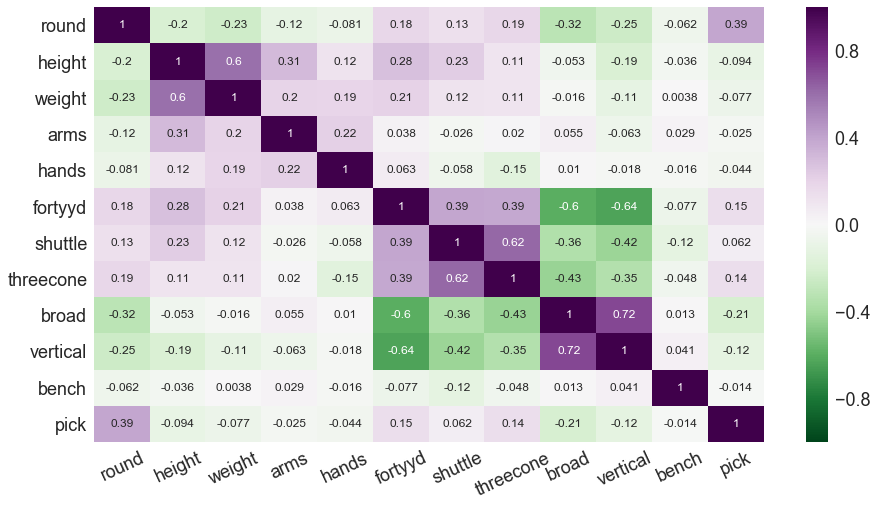

In [13]:
sns.heatmap(qb.loc[qb['round'] > 0][cols_for_qb].corr(), cmap='PRGn_r', annot=True, annot_kws={"size":12})
plt.xticks(rotation=25)
plt.show()

The correlations between these variables seem to rise when we require the QBs to have been drafted. However, is this a real effect or just a coincidence since we reduced the number of players by ~42%? It might be a little of both and perhaps we can explore this effect at a later time. 

We also must remember another limiting factor in this type of visualization: draft round should probably be a categorical variable. As such, calculating the correlation between draft round and another (numerical) variable is not so easy. Regardless, as long as we are aware of this fact we can still derive some useful meaning.   

In addition to a heatmap of the correlations, we should look at so-called pair plots showing scatter plots for all our selected variables. It can help show some of the relationships between the variables more explicitly than just a heatmap. However, as a warning, there are 12 selected variables, so this will be a lot of plots!  

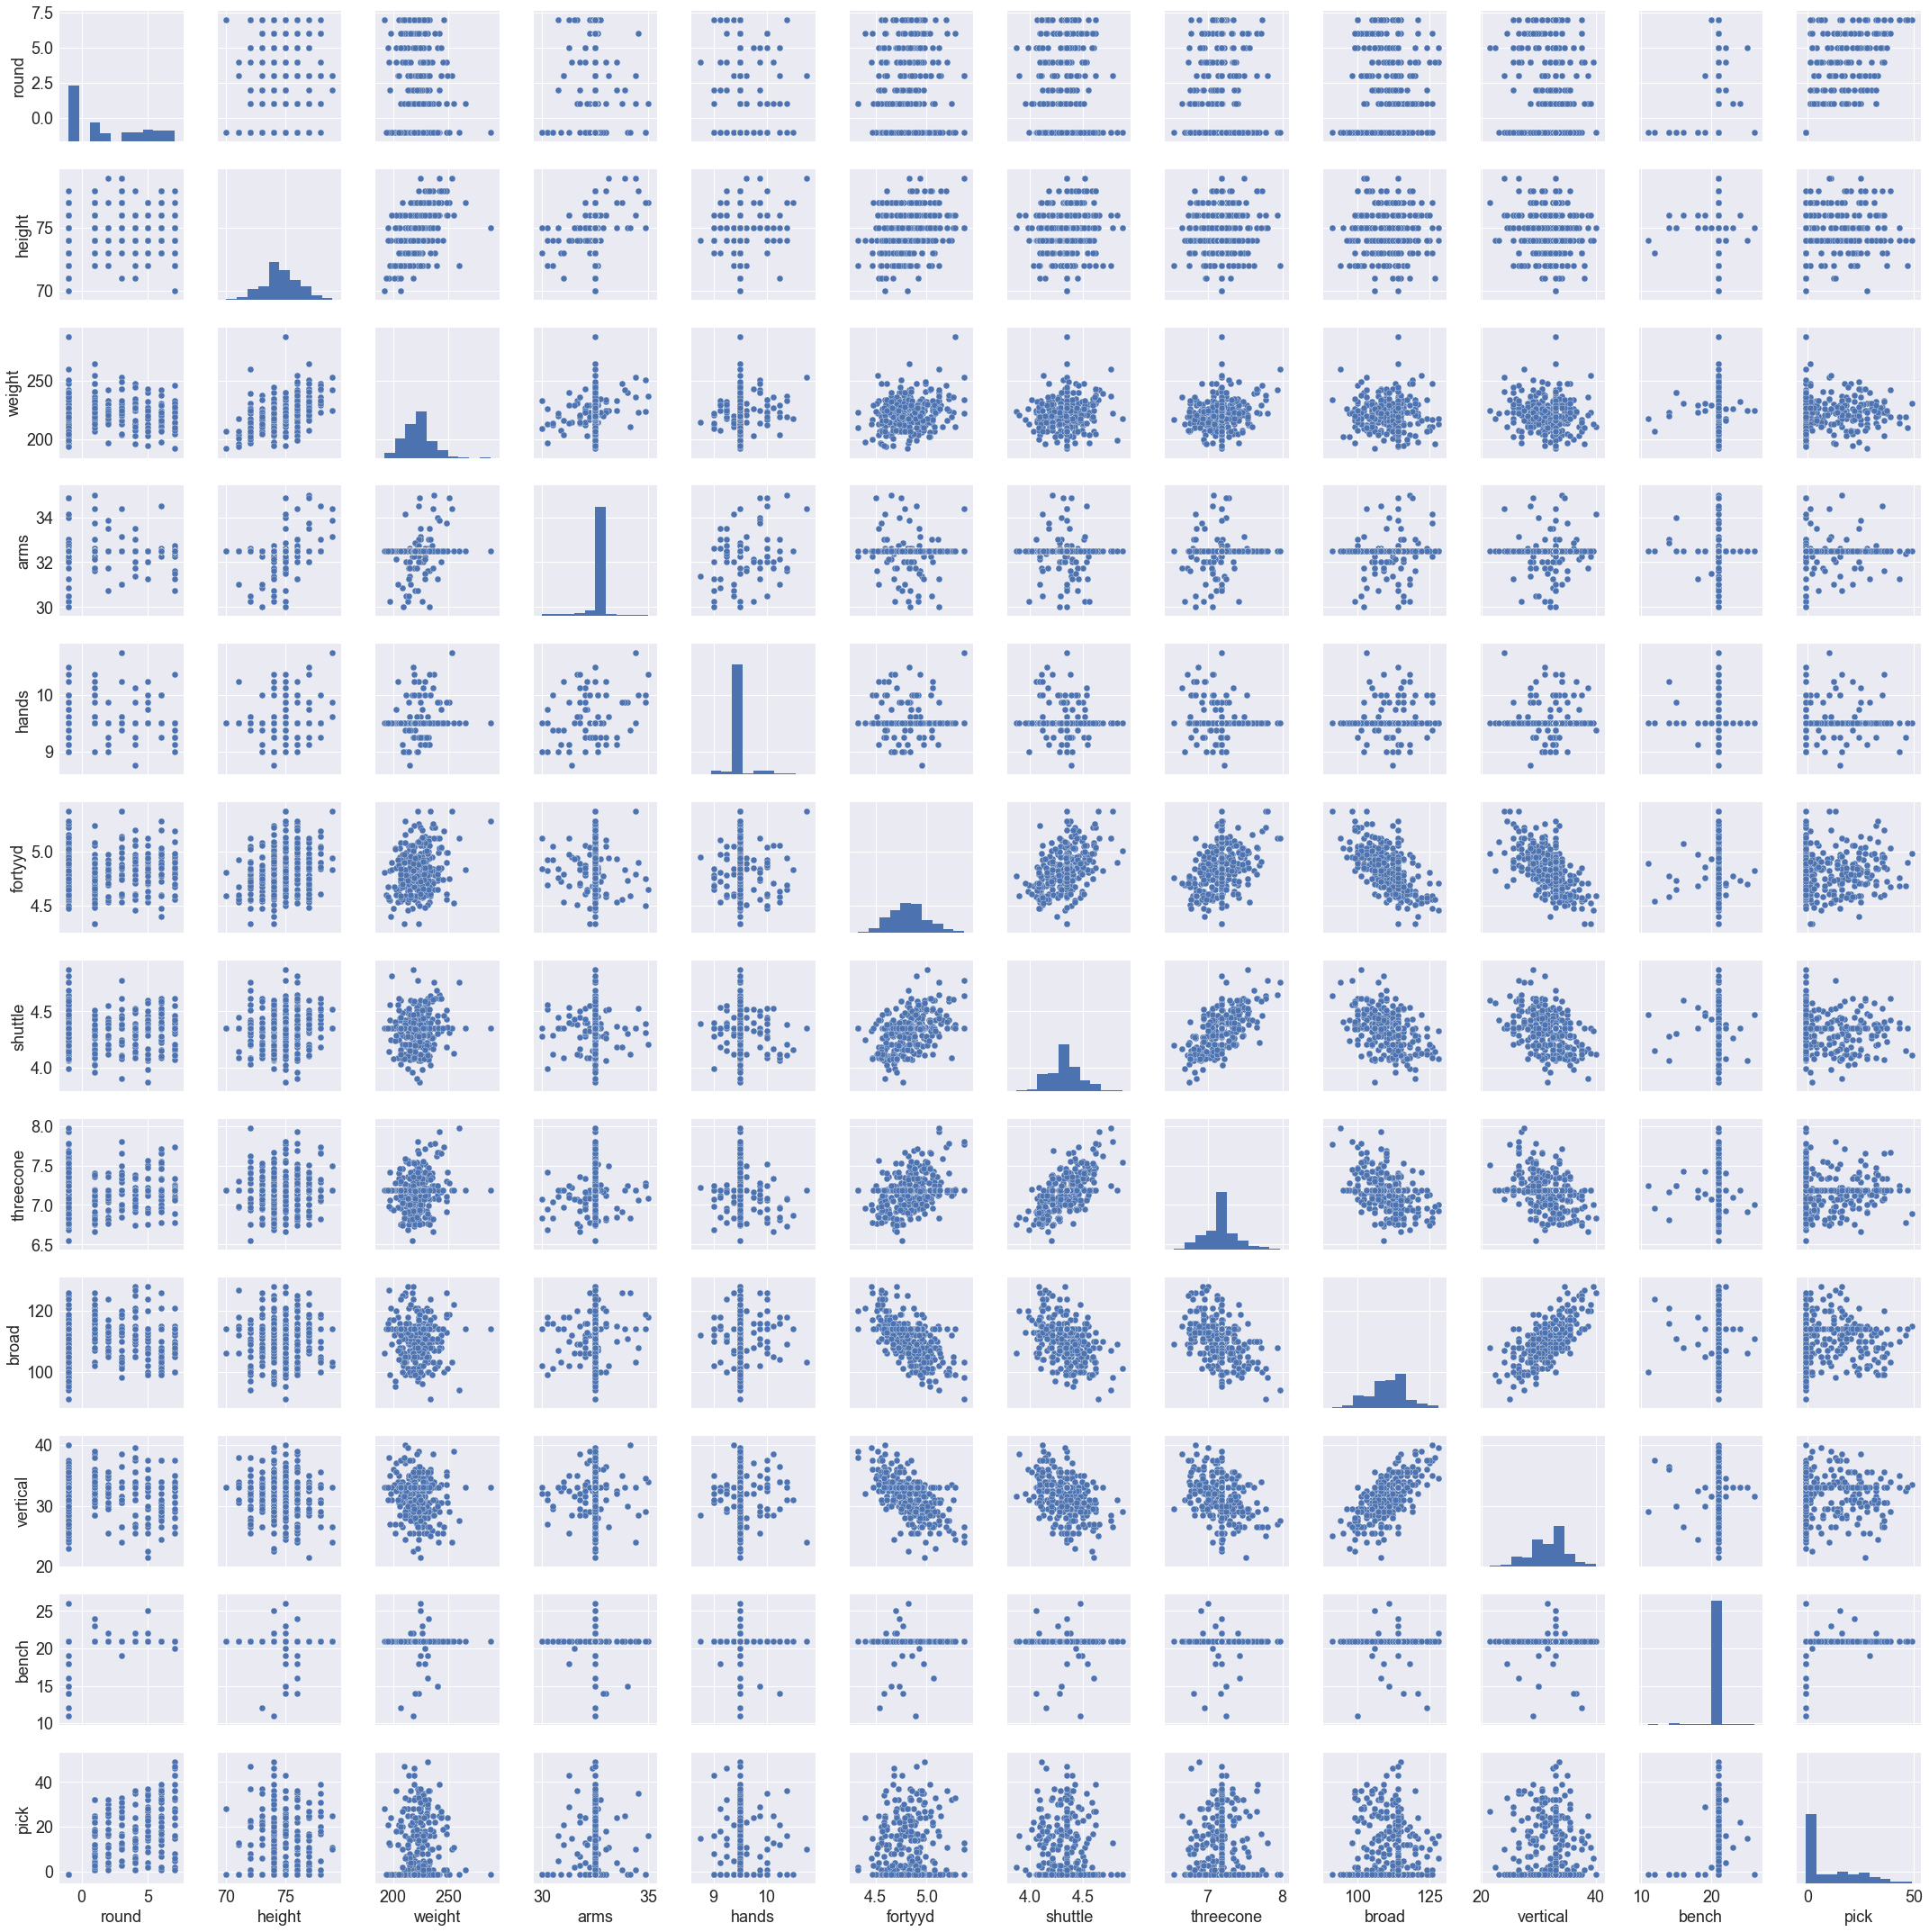

In [14]:
sns.pairplot(qb[cols_for_qb]) #Note this plots all QBs, drafted or not
plt.show()

There is a lot to digest here. But a striking feature in a lot of these plots is the lines of dots. This is because of the missing data that exists in this dataset. If we remember, a simple median imputation was used to get rid of this null data. So this is a reminder of that decision. Looking at it now, perhaps it might be a good idea to revisit it and perform a more sophisticated imputation technique. But, these plots also do confirm some of the correlated variables.

At the end of the day however, our target variable is the draft round. So it would be good to see correlations in that row (again with the limitations in mind). We can choose a few to look into greater detail by generating a "joint plot" to visualize these bivariate distributions. Let's take closer look at how the broad jump and round data are related for QBs.

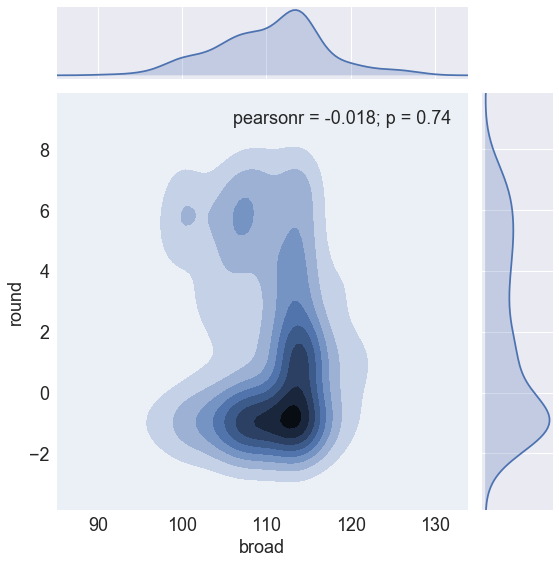

In [15]:
sns.jointplot(x='broad', y='round', data=qb, kind='kde', size=8) #Use a kde 
plt.show()

A kernel density estimation (kde) is used to help with the visuals of this type of plot. We can see how the concentration of undrafted QBs affects this relationship. A lot of the undrafted QBs have a similar broad jump, with the imputation perhaps playing a large role. We can look at another joint plot, this time of the shuttle drill (a test for lateral quickness) and draft round.

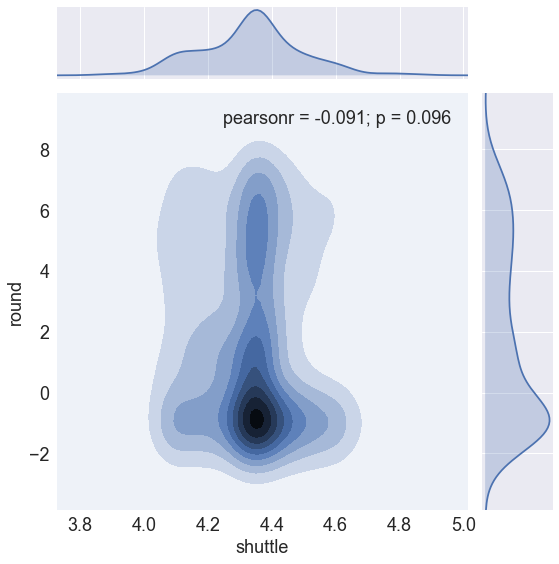

In [16]:
sns.jointplot(x='shuttle', y='round', data=qb, kind='kde', size=8)
plt.show()

We see a similar effect as before. The clustering of undrafted QBs has a large effect and a lot of the undrafted QBs have a similar shuttle time. But this gives another feel for how these types of variables are related. 

**Concluding thoughts:** We took a deeper dive into the QBs present in this dataset. We learned a little more about how they are distruted over time and draft round, as well as each team. Nearly half of the QBs went undrafted. But our median imputation technique might not be good enough for this project since it reduces the standard error and biases the relationships between variables. We can keep this all in mind as we move forward with the analysis. 

-------------

Et fin.